In [1]:
# importing required libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import lazypredict

In [2]:
# loading dataset and adding column names to the respective columns
df = pd.read_csv("./data.csv", names=['native_english_speaker', 'course_instructor', 'course', 'semester', 'class_size', 'performance_score'])
df.head()

,native_english_speaker,course_instructor,course,semester,class_size,performance_score
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [3]:
# shape and concise summary of dataframe
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   native_english_speaker  151 non-null    int64
 1   course_instructor       151 non-null    int64
 2   course                  151 non-null    int64
 3   semester                151 non-null    int64
 4   class_size              151 non-null    int64
 5   performance_score       151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [4]:
# Statistical summary of numerical / categorical data 
df.describe(include='all')

,native_english_speaker,course_instructor,course,semester,class_size,performance_score
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [5]:
# Returns random 7 rows
df.sample(7)     

,native_english_speaker,course_instructor,course,semester,class_size,performance_score
67,2,21,2,2,42,1
51,2,18,21,2,29,3
1,2,15,3,1,17,3
105,2,20,2,2,25,2
94,2,1,15,2,31,3
89,2,14,22,2,17,3
21,2,25,7,2,23,2


In [7]:
# count of classes present in output column
df['performance_score'].value_counts()

3    52
2    50
1    49
Name: performance_score, dtype: int64

<AxesSubplot:xlabel='index', ylabel='performance_score'>

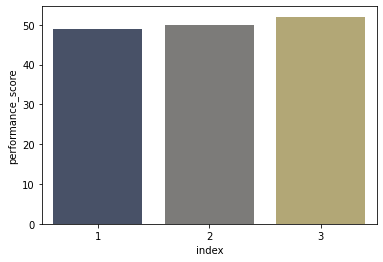

In [8]:
# plotting to check if there is an imbalance in the classes present in target variable.
xx = df['performance_score'].value_counts().reset_index()
sns.barplot(x='index', y='performance_score', data=xx, palette='cividis')

In [ ]:
#EDA
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile

In [10]:
df.nunique()    #Returns unique values count of columns

native_english_speaker     2
course_instructor         25
course                    26
semester                   2
class_size                46
performance_score          3
dtype: int64

In [11]:
df.duplicated().sum()

41

In [12]:
df.columns

Index(['native_english_speaker', 'course_instructor', 'course', 'semester',
       'class_size', 'performance_score'],
      dtype='object')

In [13]:
# separating x and y (features and class) 
x = df.drop('performance_score', axis=1)
y = df['performance_score']

In [14]:
# Printing the shape of the dataset  
print(x.shape, y.shape)

(151, 5) (151,)


In [15]:
# train, test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)
models

In [ ]:
# models accuracy of predictions
predictions

In [18]:
# checking count of classes in target variable
print(y_train.value_counts())

3    43
2    39
1    38
Name: performance_score, dtype: int64


In [428]:
df.dtypes

native               int64
course_instructor    int64
course               int64
semester             int64
class_size           int64
class_target         int64
dtype: object

In [19]:
#Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

# One-Hot Encoding object knows how to understand word labels.
ohe = OneHotEncoder()

ohe.fit(x[['native_english_speaker', 'course_instructor', 'course','semester']])

OneHotEncoder()

In [20]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_), ['native_english_speaker', 'course_instructor', 'course','semester']), 
                                                    remainder='passthrough')

In [21]:
# GridsearchCV to fine tune the parameters - 1
#Initializing GridSearchCV() object and fitting it with hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [401]:
#Initializing GridSearchCV() object and fitting it with hyperparameters
param_grid = { 
    'n_estimators': [700,800,900],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

In [364]:
#Getting the Best Hyperparameters - 1
CV_rfc.best_params_


{'criterion': 'gini', 'n_estimators': 700}

In [ ]:
# GridsearchCV to fine tune the parameters - 2
clf = GridSearchCV(estimator, param_grid, cv, scoring)

In [ ]:
#Initializing GridSearchCV() object and fitting it with hyperparameters
from sklearn.model_selection import GridSearchCV
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(x_train, y_train)

In [394]:
#Getting the Best Hyperparameters - 2
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 14, 'max_features': 2}
0.5916666666666666


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

rf_rg = RandomForestClassifier(n_estimators = 900, criterion = 'entropy', random_state = 0)

In [23]:
rf_pipe = make_pipeline(column_trans, rf_rg)

In [24]:
rf_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array([1, 2], dtype=int64),
                                                                            array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25], dtype=int64),
                                                                            array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64),
                                                                            array([1, 2], dtype=int64)]),
                                                  ['native_english_speaker',
                                                   'course_instructor',
                                                   'course', '

In [25]:
y_pred = rf_pipe.predict(x_test)

In [26]:
result = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{result}")

result1 = classification_report(y_test, y_pred)
print(f"Classification Report: \n{result1}")

result2 = accuracy_score(y_test,y_pred)
print(f"Accuracy: \n{result2}")

#Train Data Accuracy
accuracy_score(y_train, rf_pipe.predict(x_train))


Confusion Matrix: 
[[11  0  0]
 [ 3  8  0]
 [ 2  2  5]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.80      0.73      0.76        11
           3       1.00      0.56      0.71         9

    accuracy                           0.77        31
   macro avg       0.83      0.76      0.76        31
weighted avg       0.82      0.77      0.77        31

Accuracy: 
0.7741935483870968


0.9583333333333334

In [27]:

# saving the model in a pickle file
# importing the model
import pickle

rfr_model = 'rf_clf_model.pkl'
pickle.dump(rf_pipe, open(rfr_model, 'wb'))

